 ## Projeto Ebac - Parceria Semantix
 <br>
Neste projeto vamos aplicar a metodologia Crisp-DM e seus respectivos 6 passos.

### Etapa 1 CRISP - DM: Entendimento do negócio

### Etapa 2 Crisp-DM: Entendimento dos dados

In [21]:
import ipywidgets as widgtes

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

%matplotlib inline
import warnings;   warnings.filterwarnings("ignore")

df = pd.read_csv("C:\\Users\\Belit\\Downloads\\supplychain.csv", sep = ',', encoding = 'utf-8')
df.head()

year  biome country_production_iso3_id state_production  \
0  2016  PAMPA                        BRA               RS   
1  2016  PAMPA                        BRA               RS   
2  2016  PAMPA                        BRA               RS   
3  2016  PAMPA                        BRA               RS   
4  2016  PAMPA                        BRA               RS   

  municipality_name_production  municipality_id_production  \
0                       acegua                   4300034.0   
1                       acegua                   4300034.0   
2                     alegrete                   4300406.0   
3                     alegrete                   4300406.0   
4                arroio grande                   4301305.0   

  municipality_name_logistics_hub  municipality_id_logistics_hub  \
0                            bage                        4301602   
1                            bage                        4301602   
2                            bage                        4301602   
3                            bage                        4301602   
4                            bage                        4301602   

        exporter_name        exporter_group  ... country_first_import_iso3_id  \
0  PAMPEANO ALIMENTOS  MARFRIG GLOBAL FOODS  ...                          OMN   
1  PAMPEANO ALIMENTOS  MARFRIG GLOBAL FOODS  ...                          OMN   
2  PAMPEANO ALIMENTOS  MARFRIG GLOBAL FOODS  ...                          OMN   
3  PAMPEANO ALIMENTOS  MARFRIG GLOBAL FOODS  ...                          OMN   
4  PAMPEANO ALIMENTOS  MARFRIG GLOBAL FOODS  ...                          OMN   

  country_first_import_name economic_bloc      fob_usd beef_equivalent_tonnes  \
0                      OMAN          OMAN  3592.545928               2.479852   
1                      OMAN          OMAN  1946.089773               1.518884   
2                      OMAN          OMAN   936.431267               0.646397   
3                      OMAN          OMAN   507.266810               0.395912   
4                      OMAN          OMAN  1964.813184               1.356266   

       product_description  zero_deforestation_commitments  \
0  PROCESSED BEEF PRODUCTS                             NaN   
1  PROCESSED BEEF PRODUCTS                             NaN   
2  PROCESSED BEEF PRODUCTS                             NaN   
3  PROCESSED BEEF PRODUCTS                             NaN   
4  PROCESSED BEEF PRODUCTS                             NaN   

  cattle_deforestation_exposure co2_emissions_deforestation_5  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

               type  
0  Beef equivalents  
1  Beef equivalents  
2  Beef equivalents  
3  Beef equivalents  
4  Beef equivalents  

[5 rows x 22 columns]

In [124]:
# Identificando valores missing
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31381 entries, 0 to 31380
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             31381 non-null  int64  
 1   biome                            31381 non-null  object 
 2   country_production_iso3_id       31381 non-null  object 
 3   state_production                 31381 non-null  object 
 4   municipality_name_production     31381 non-null  object 
 5   municipality_id_production       27870 non-null  float64
 6   municipality_name_logistics_hub  31381 non-null  object 
 7   municipality_id_logistics_hub    31381 non-null  int64  
 8   exporter_name                    31381 non-null  object 
 9   exporter_group                   31381 non-null  object 
 10  importer_name                    31160 non-null  object 
 11  importer_group                   31160 non-null  object 
 12  country_first_impo

year                                   0
biome                                  0
country_production_iso3_id             0
state_production                       0
municipality_name_production           0
municipality_id_production          3511
municipality_name_logistics_hub        0
municipality_id_logistics_hub          0
exporter_name                          0
exporter_group                         0
importer_name                        221
importer_group                       221
country_first_import_iso3_id           0
country_first_import_name              0
economic_bloc                          0
fob_usd                                0
beef_equivalent_tonnes                 0
product_description                    0
zero_deforestation_commitments     30226
cattle_deforestation_exposure      15567
co2_emissions_deforestation_5      13241
type                                   0
dtype: int64

In [125]:
# Substituindo os valores missing pela média
df['cattle_deforestation_exposure'].fillna(value=df['cattle_deforestation_exposure'].mean(), inplace=True)
df['co2_emissions_deforestation_5'].fillna(value=df['co2_emissions_deforestation_5'].mean(), inplace=True)
df['municipality_id_production'].fillna(value=df['municipality_id_production'].mean(), inplace=True)

In [126]:
df.drop(['importer_name','importer_group','zero_deforestation_commitments'], axis=1, inplace=True)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31381 entries, 0 to 31380
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             31381 non-null  int64  
 1   biome                            31381 non-null  object 
 2   country_production_iso3_id       31381 non-null  object 
 3   state_production                 31381 non-null  object 
 4   municipality_name_production     31381 non-null  object 
 5   municipality_id_production       31381 non-null  float64
 6   municipality_name_logistics_hub  31381 non-null  object 
 7   municipality_id_logistics_hub    31381 non-null  int64  
 8   exporter_name                    31381 non-null  object 
 9   exporter_group                   31381 non-null  object 
 10  country_first_import_iso3_id     31381 non-null  object 
 11  country_first_import_name        31381 non-null  object 
 12  economic_bloc     

In [128]:
# Nesta passo vamos gerar o Profile Report do objeto de estudo.
prof = ProfileReport(df, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [129]:
# Importando o Profile Report para arquivo .html
prof.to_file('./Downloads/df_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [130]:
df.describe().transpose()

count          mean            std  \
year                           31381.0  2.015997e+03       0.056361   
municipality_id_production     31381.0  3.670325e+06  978250.001261   
municipality_id_logistics_hub  31381.0  3.451992e+06  799618.576861   
fob_usd                        31381.0  1.608302e+04   75854.663578   
beef_equivalent_tonnes         31381.0  7.005477e+00      40.386354   
cattle_deforestation_exposure  31381.0  1.634094e+00      10.471250   
co2_emissions_deforestation_5  31381.0  6.889633e+02    5417.131449   

                                        min           25%           50%  \
year                           2.015000e+03  2.016000e+03  2.016000e+03   
municipality_id_production     1.100015e+06  3.510708e+06  3.544806e+06   
municipality_id_logistics_hub  1.100114e+06  3.527108e+06  3.527108e+06   
fob_usd                        2.271378e-04  9.691616e+02  2.386262e+03   
beef_equivalent_tonnes         2.344795e-07  4.101896e-01  1.011332e+00   
cattle_deforestation_exposure  2.877382e-10  6.339102e-02  1.634094e+00   
co2_emissions_deforestation_5  2.553761e-07  7.235666e+00  2.975954e+02   

                                        75%           max  
year                           2.016000e+03  2.016000e+03  
municipality_id_production     4.306767e+06  5.221551e+06  
municipality_id_logistics_hub  3.527108e+06  4.301602e+06  
fob_usd                        8.022058e+03  5.287260e+06  
beef_equivalent_tonnes         3.468851e+00  3.179334e+03  
cattle_deforestation_exposure  1.634094e+00  9.832730e+02  
co2_emissions_deforestation_5  6.889633e+02  4.993756e+05

In [131]:
# Matriz de correlação das variáveis.
matriz = df.corr() 
print("Correlation Matrix is : ") 
print(matriz) 

Correlation Matrix is : 
                                   year  municipality_id_production  \
year                           1.000000                   -0.033282   
municipality_id_production    -0.033282                    1.000000   
municipality_id_logistics_hub -0.060076                    0.754062   
fob_usd                       -0.002748                   -0.058291   
beef_equivalent_tonnes        -0.002805                   -0.043620   
cattle_deforestation_exposure  0.000529                   -0.137253   
co2_emissions_deforestation_5  0.000431                   -0.154853   

                               municipality_id_logistics_hub   fob_usd  \
year                                               -0.060076 -0.002748   
municipality_id_production                          0.754062 -0.058291   
municipality_id_logistics_hub                       1.000000 -0.054598   
fob_usd                                            -0.054598  1.000000   
beef_equivalent_tonnes              

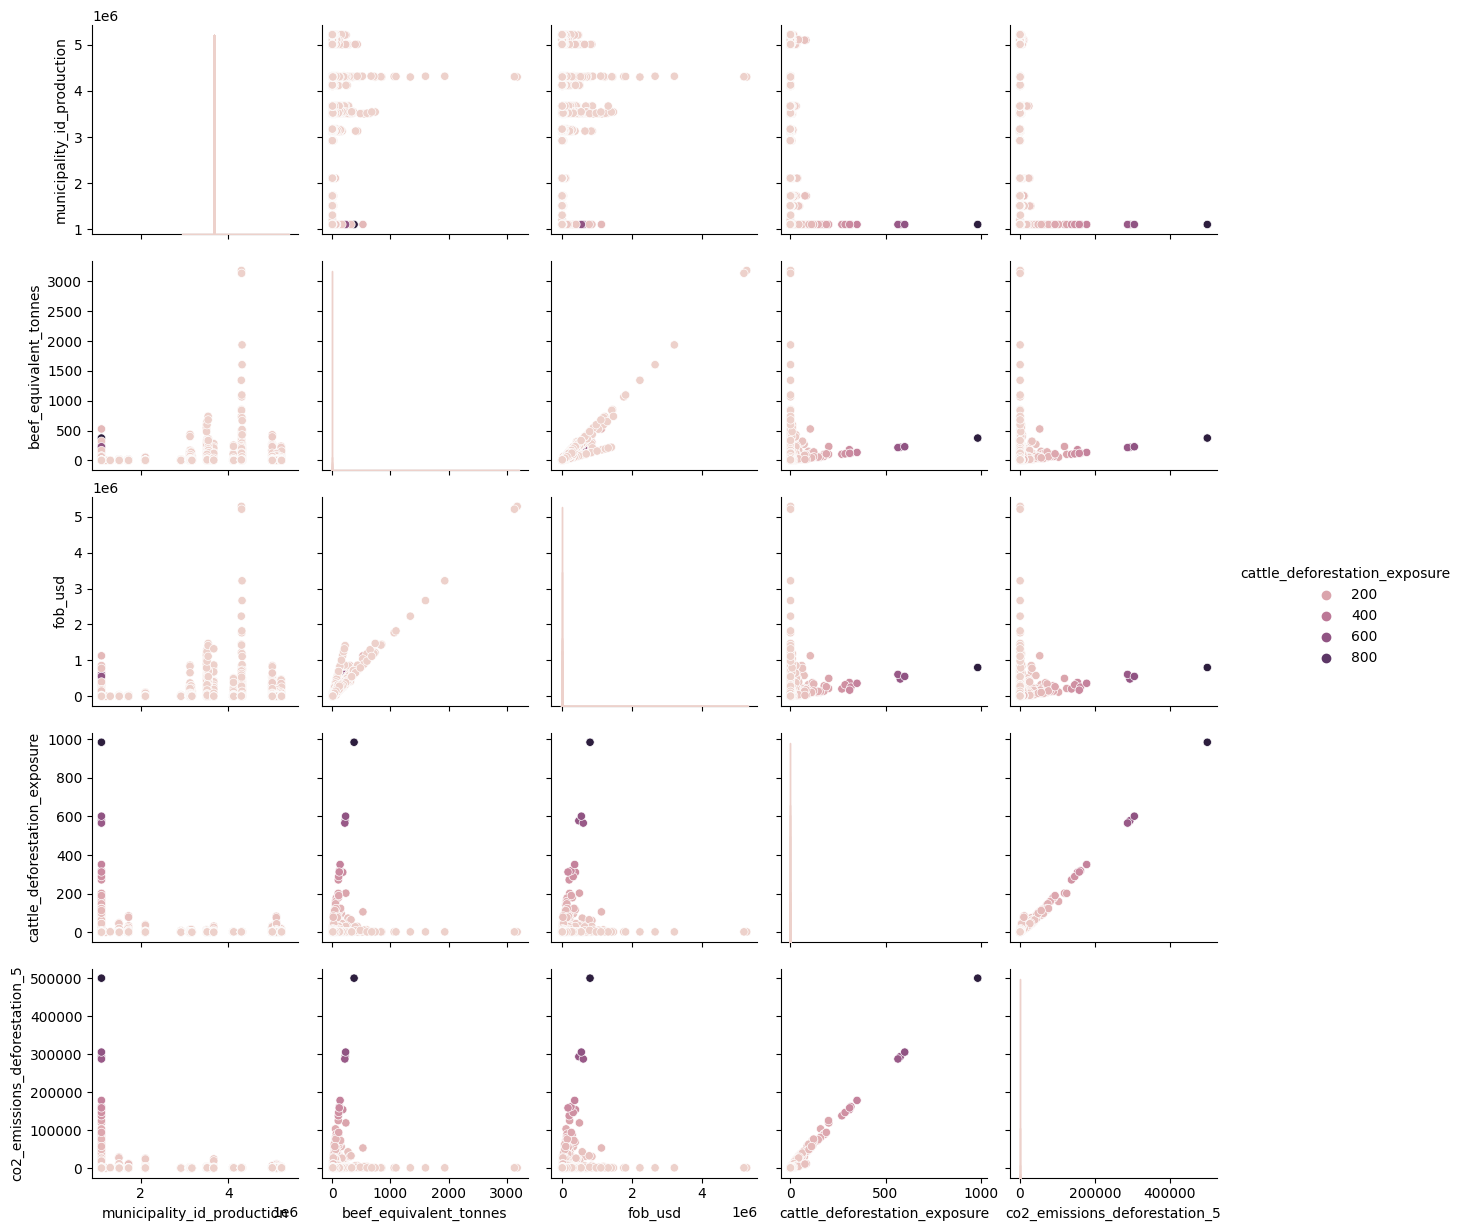

In [132]:
# Scatterplot
sns.color_palette("flare")
sns.pairplot(data=df,
            hue='cattle_deforestation_exposure',
            vars=['municipality_id_production',
                  'beef_equivalent_tonnes',
                 'fob_usd',
                 'cattle_deforestation_exposure',
                 'co2_emissions_deforestation_5'],)
plt.show()

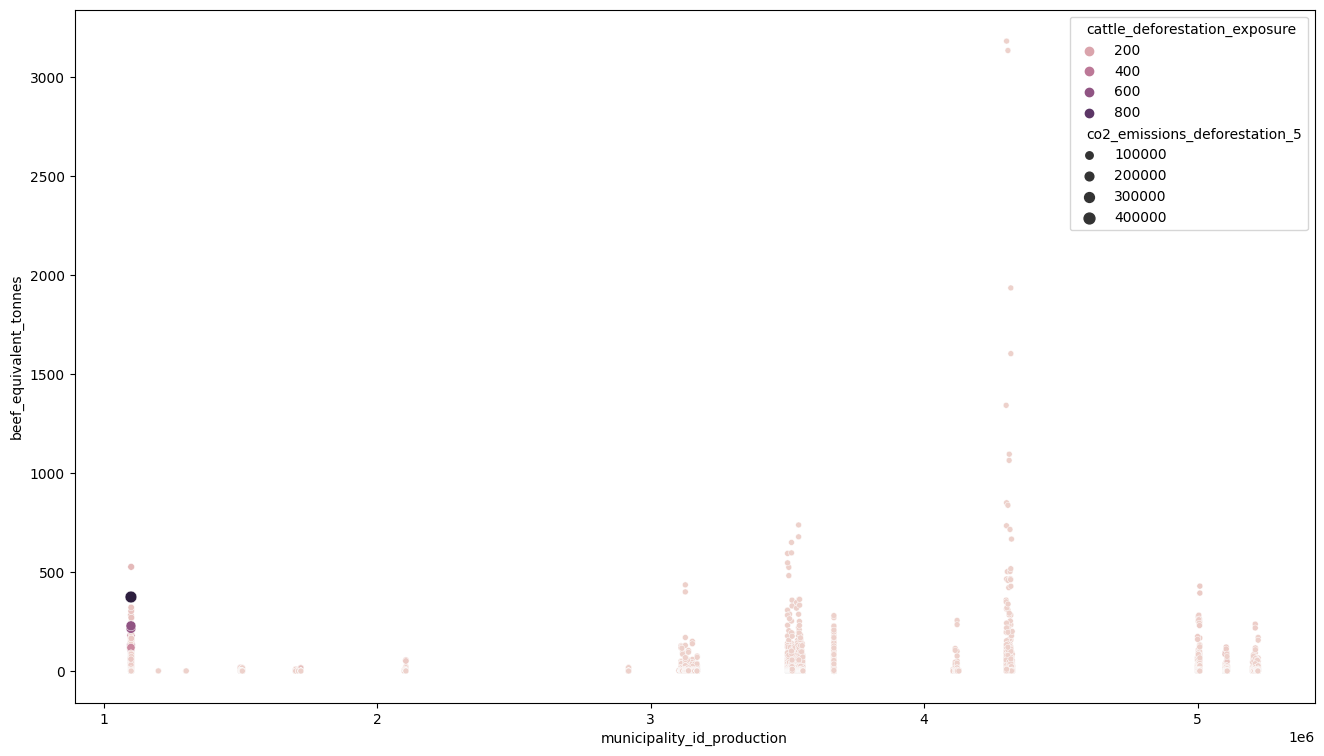

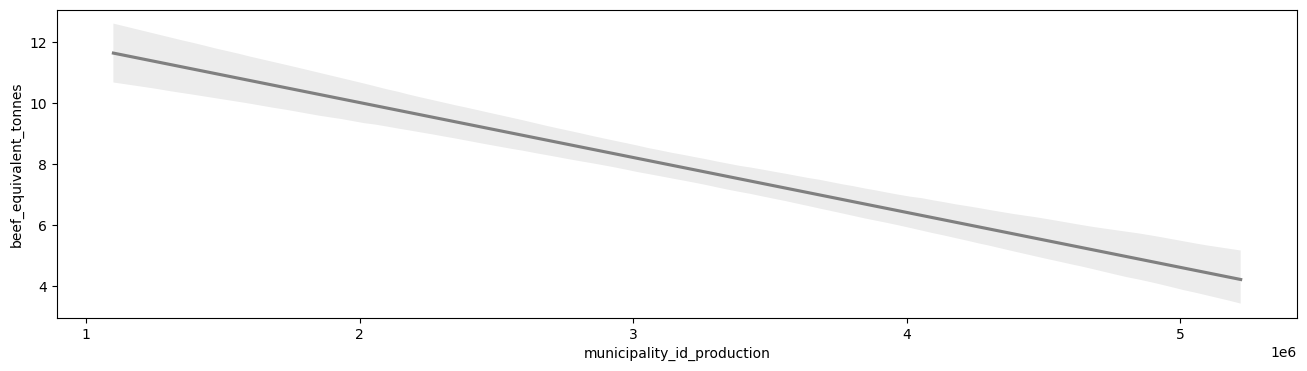

In [133]:
# Linha de tendência
plt.figure(figsize=(16,9))

sns.scatterplot(x='municipality_id_production',
                y='beef_equivalent_tonnes', 
                hue='cattle_deforestation_exposure', 
                size='co2_emissions_deforestation_5',
                data=df,
                alpha=1)
plt.show()
# Linha de tendência:
sns.regplot(x='municipality_id_production', 
            y='beef_equivalent_tonnes', 
            data=df, 
            scatter=False, 
            color='.50')

plt.show()

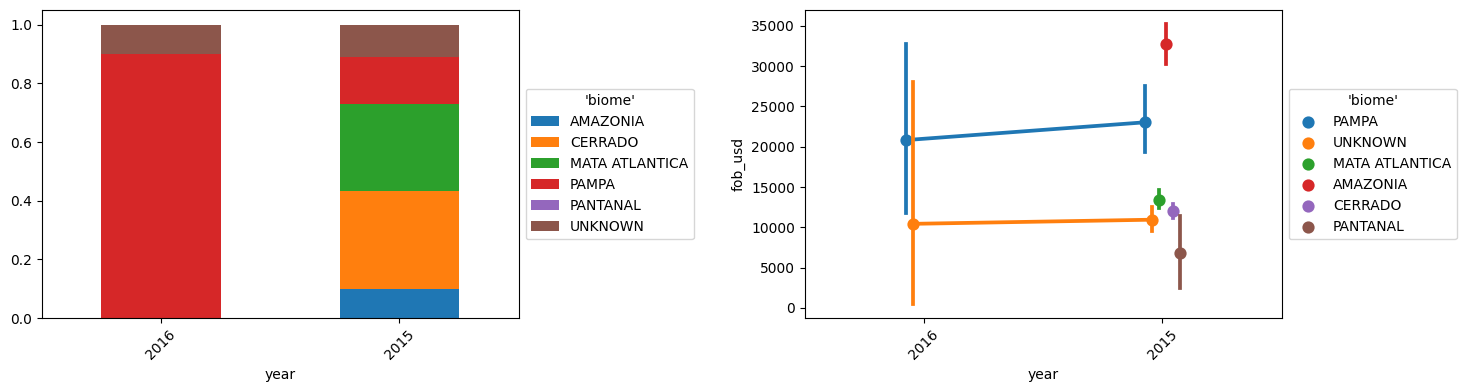

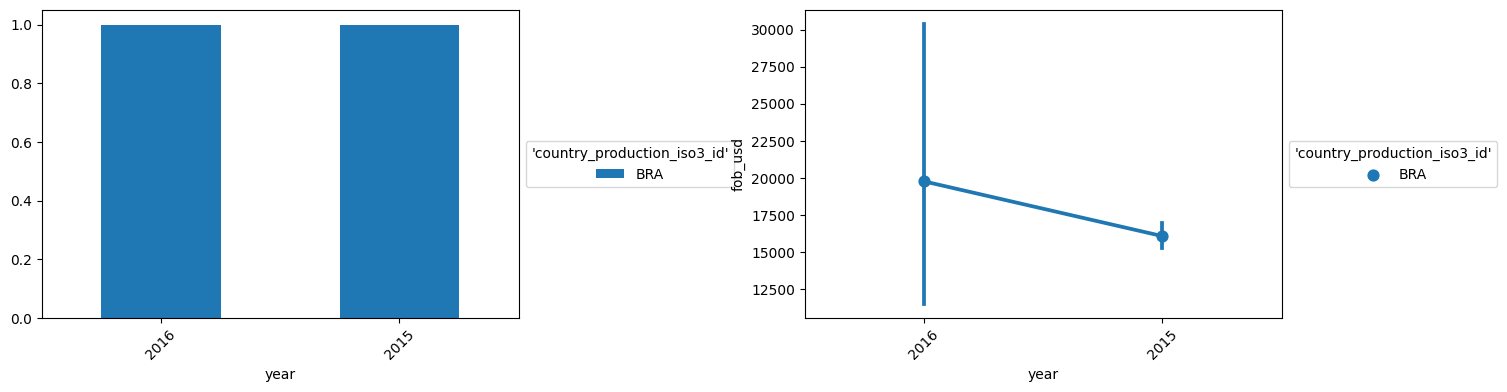

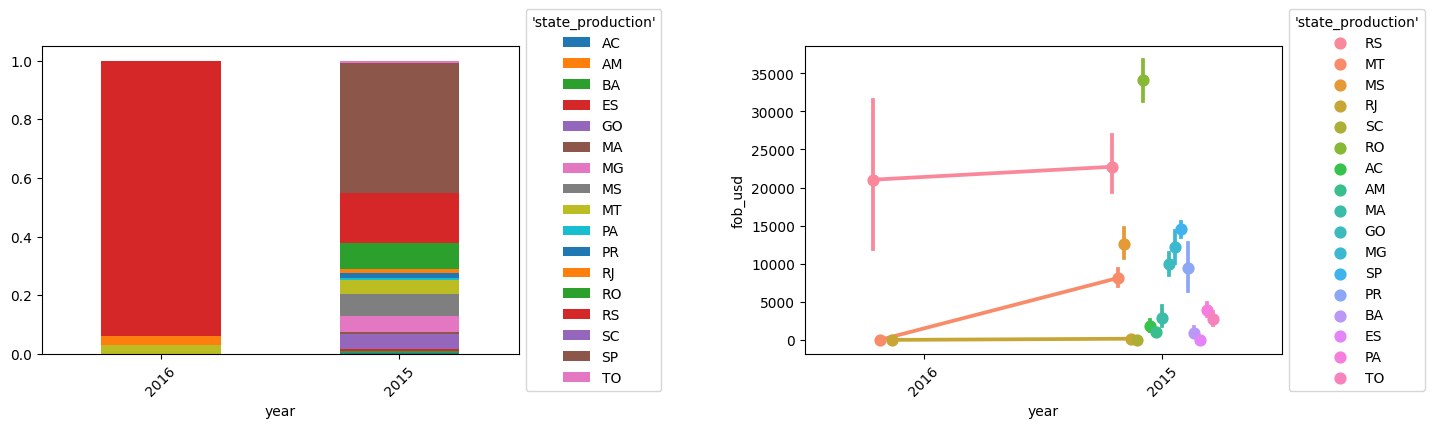

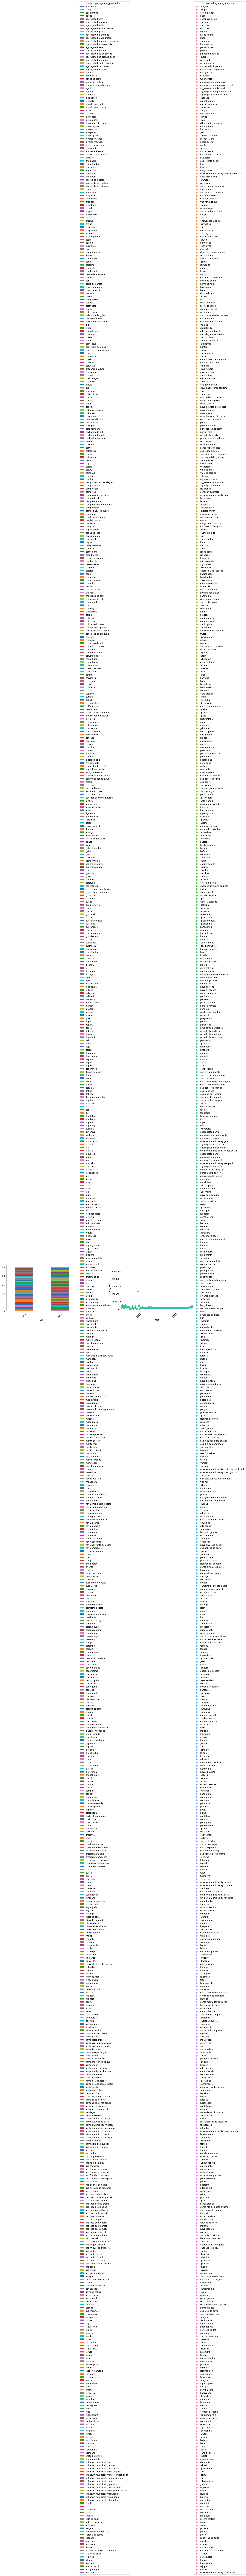

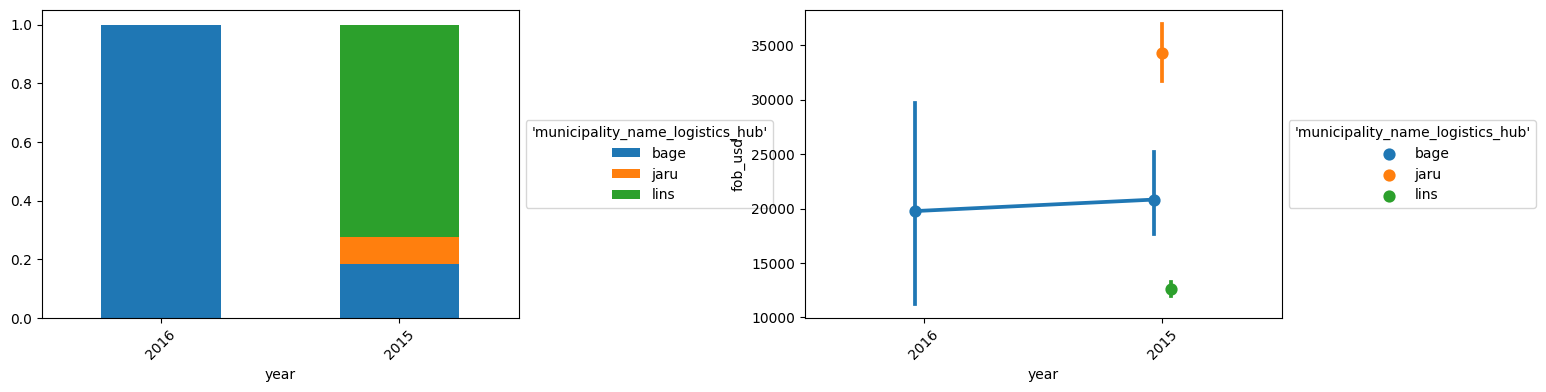

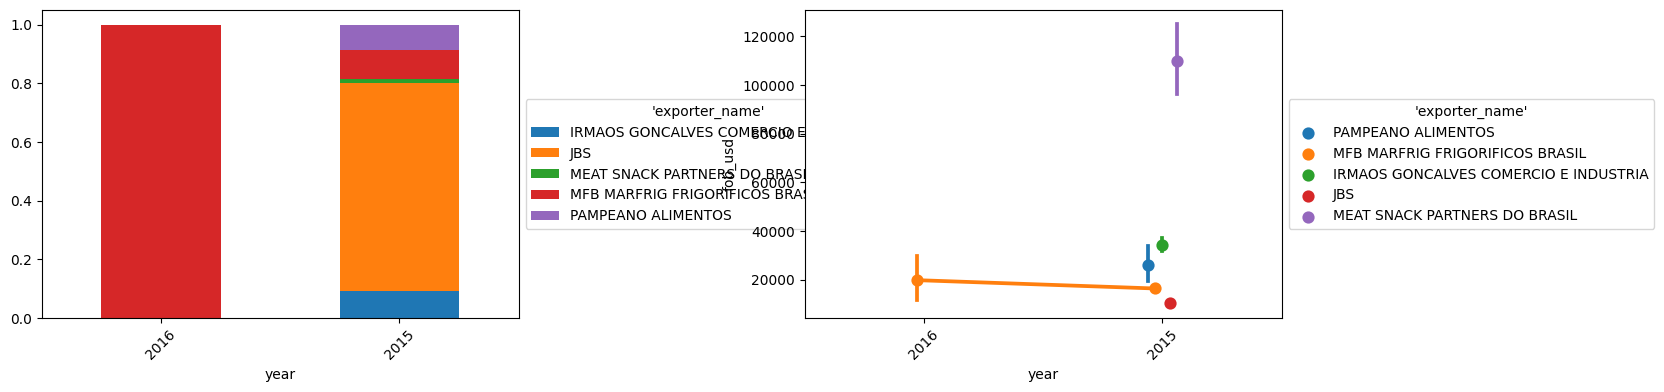

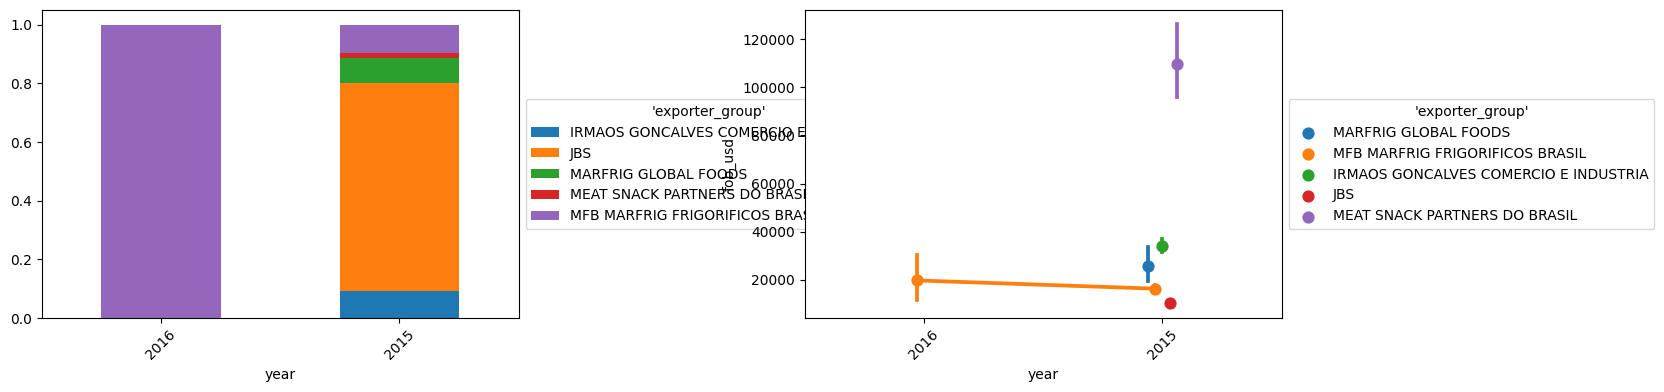

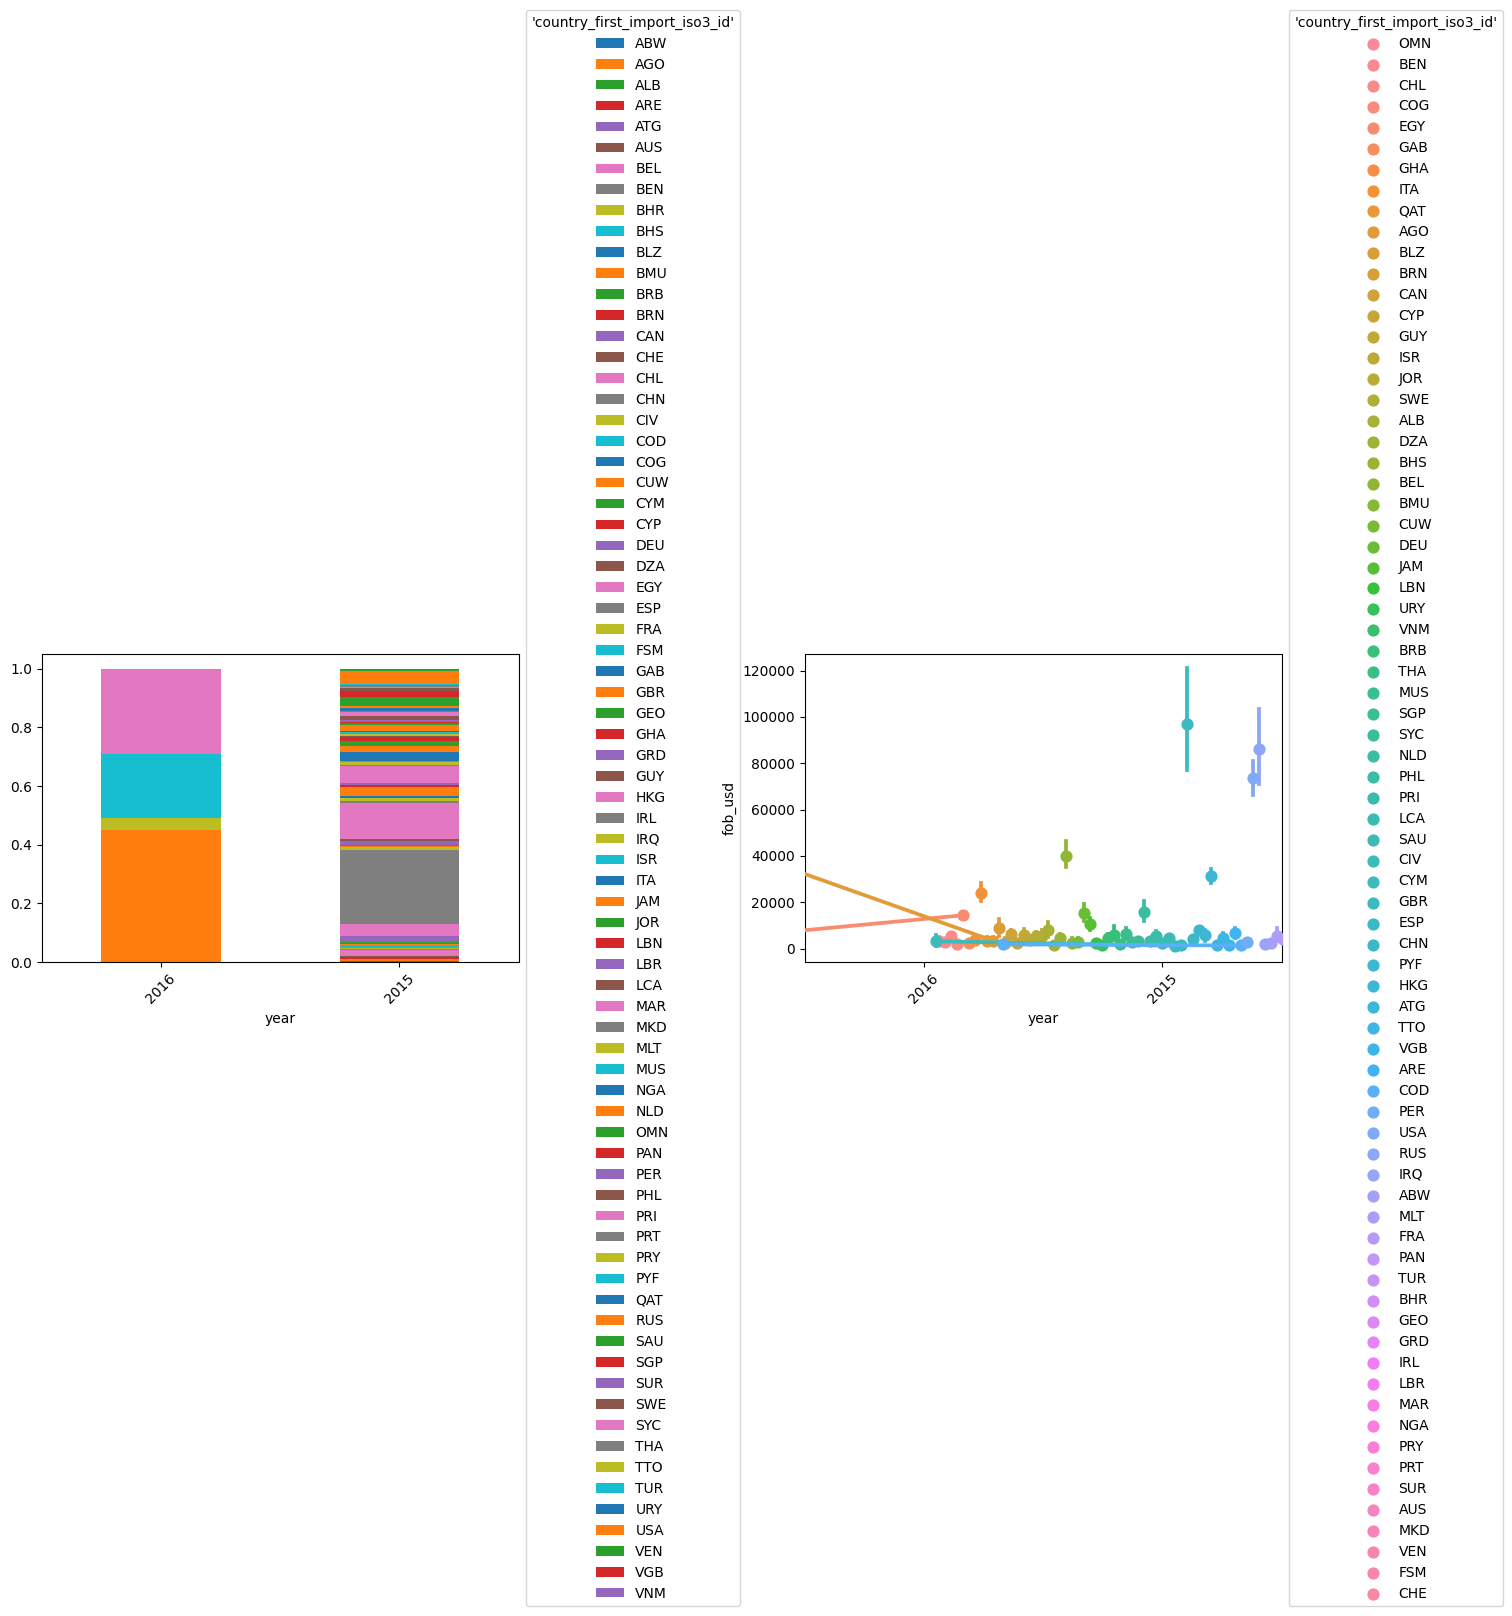

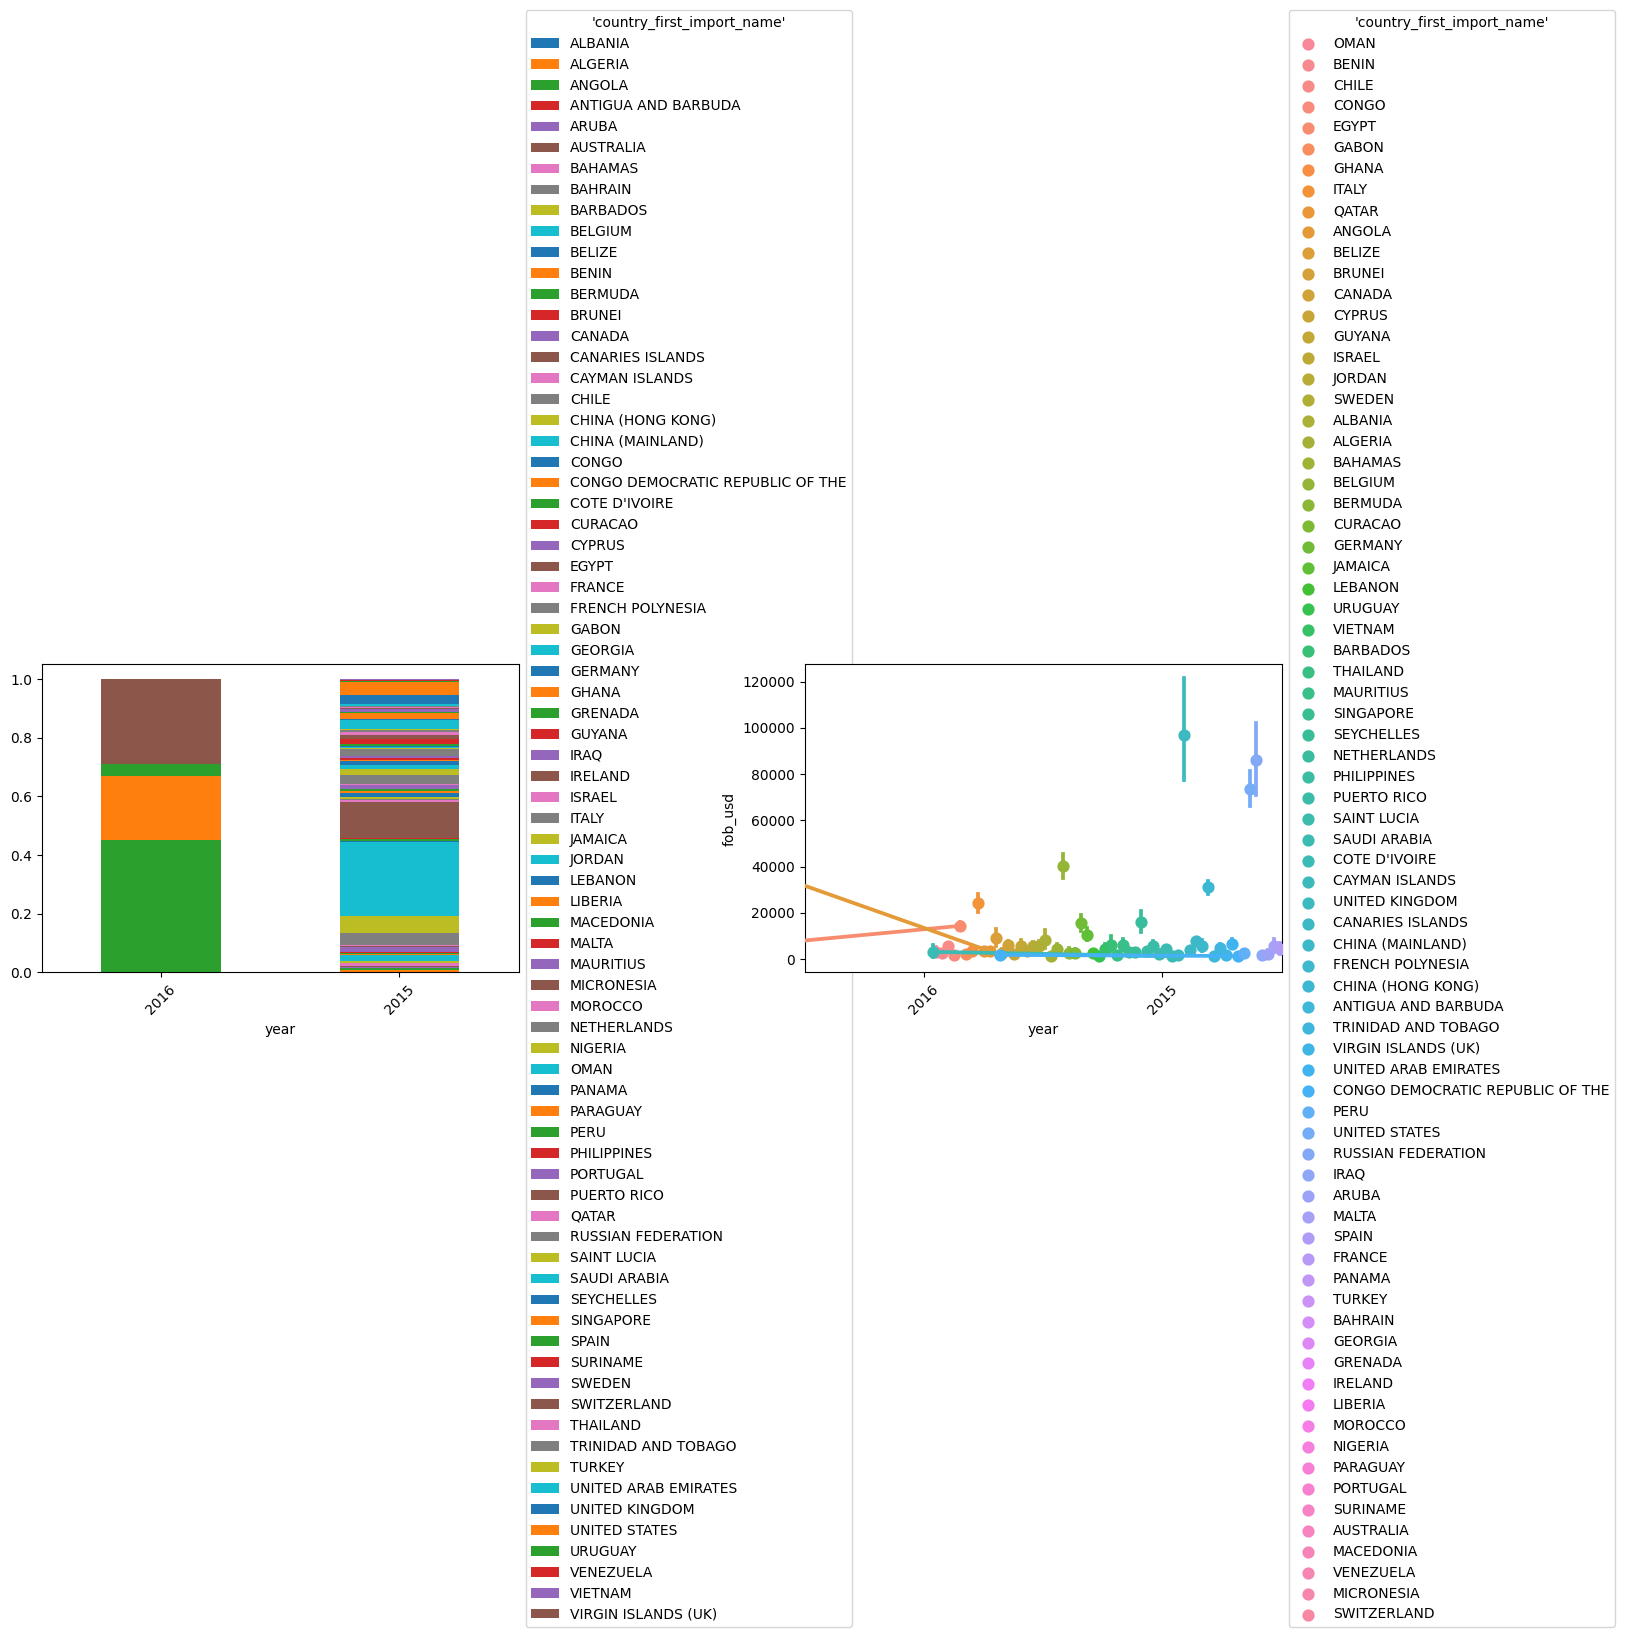

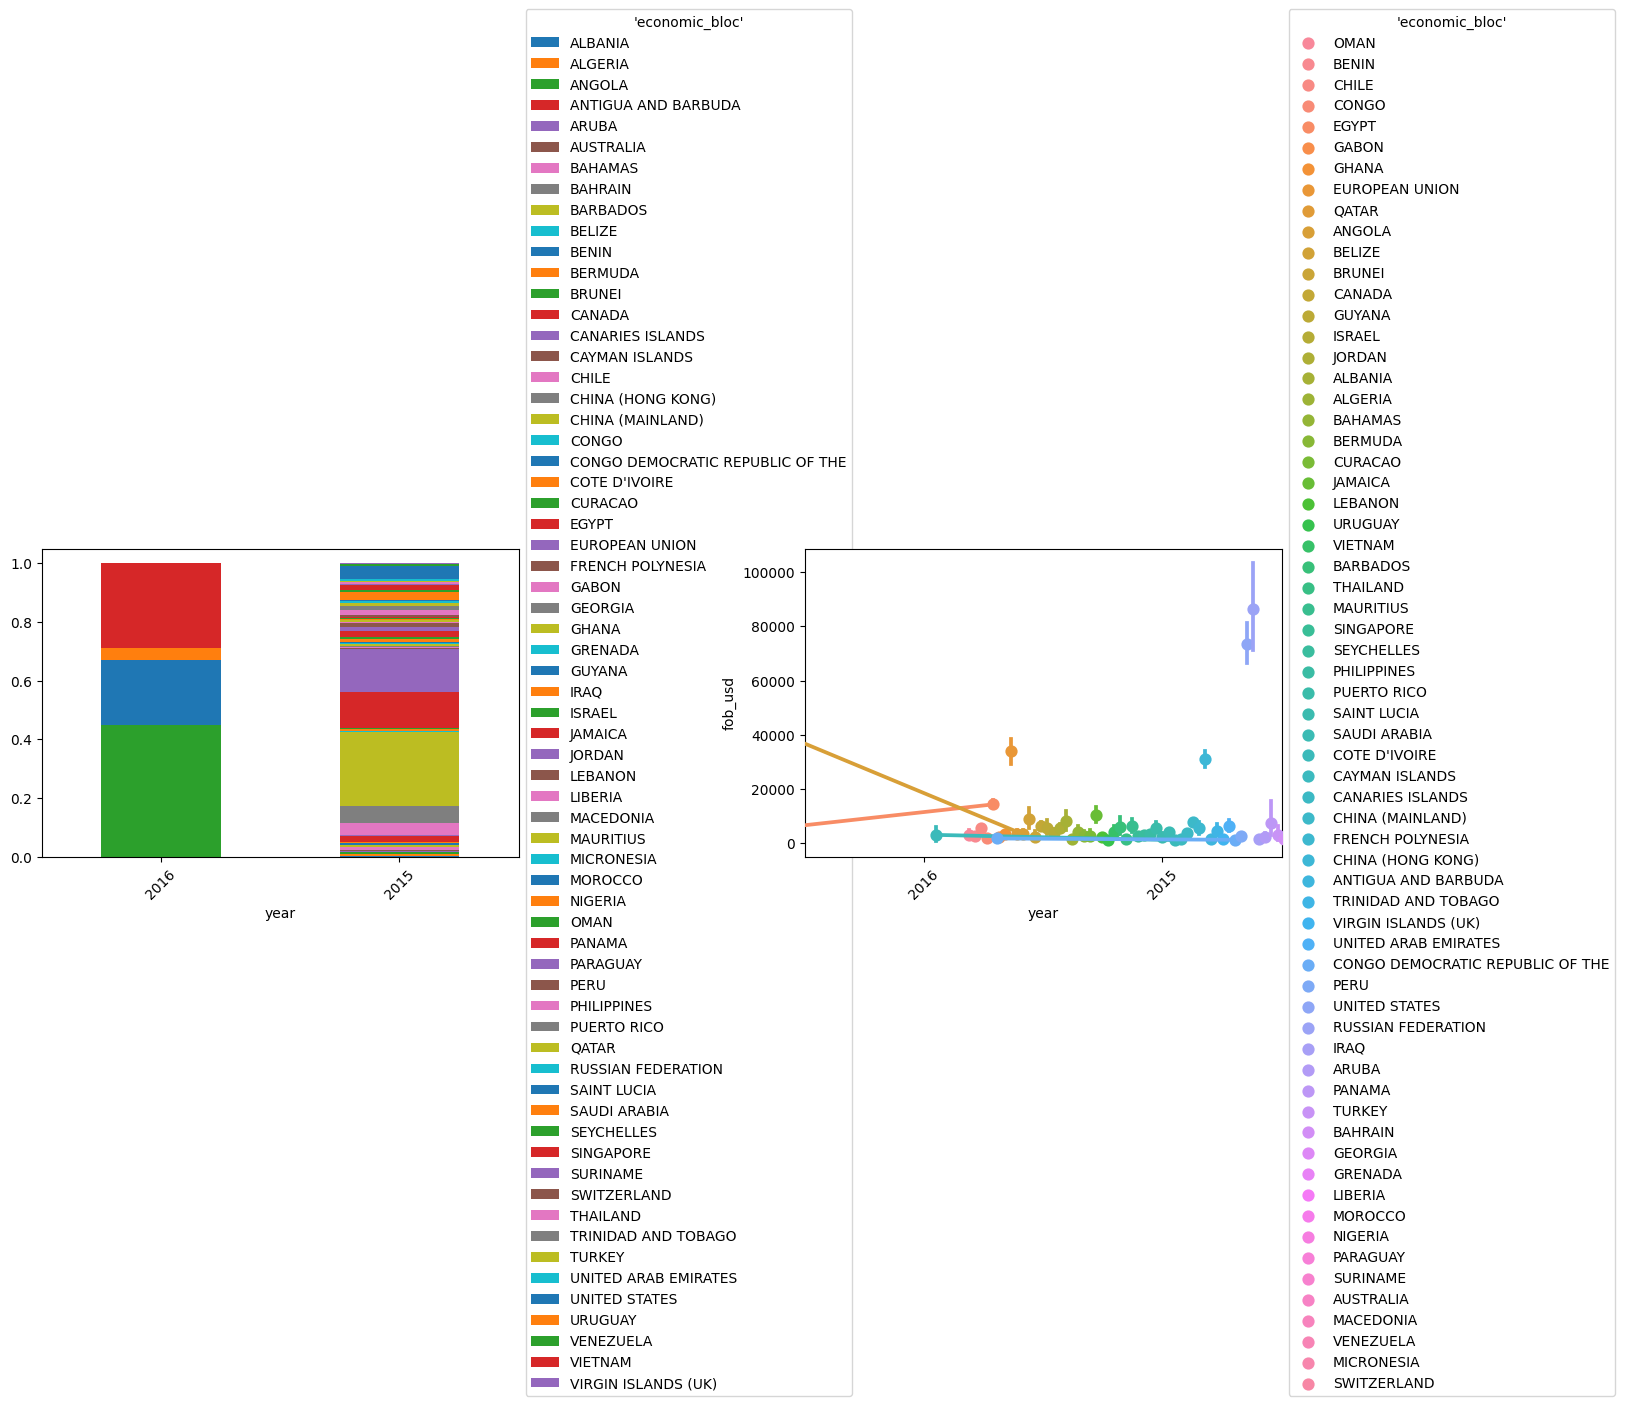

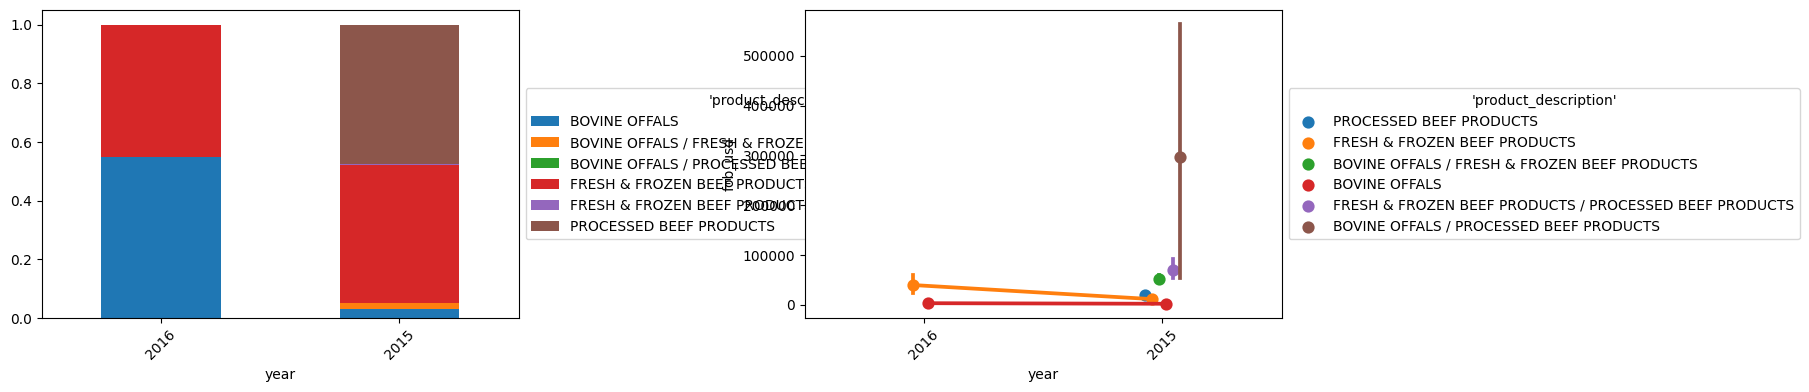

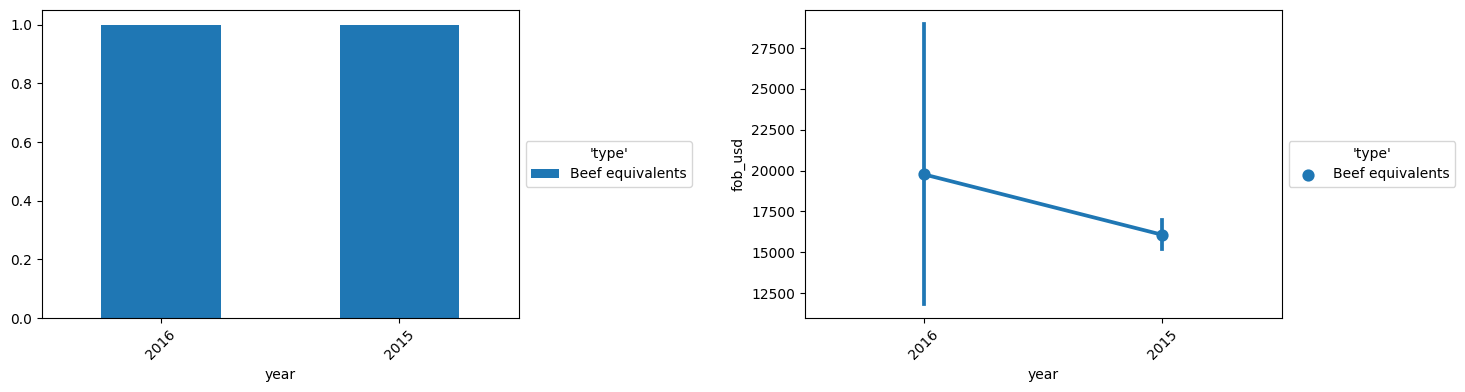

In [134]:
qualitativas = df.select_dtypes(include=['object', 'boolean']).columns

plt.rc('figure', figsize=(16,4))

for col in qualitativas:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.subplots_adjust(wspace=.6)
    
    tick_labels = df['year'].unique()
    
    # barras empilhadas:
    year_crosstab = pd.crosstab(index=df['year'], 
                                 columns=df[col], 
                                 normalize='index')
    ax0 = year_crosstab.plot.bar(stacked=True, 
                                  ax=axes[0])
    ax0.set_xticklabels(labels=tick_labels, rotation=45)
    axes[0].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    # perfis médios no tempo: 
    ax1 = sns.pointplot(x='year', y='fob_usd', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
    ax1.set_xticklabels(labels=tick_labels, rotation=45)
    axes[1].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    plt.show()

### Etapa 3 Crisp-DM: Preparação dos dados

In [135]:
df.drop(columns='year', inplace=True)
df.dropna(inplace=True)

pd.DataFrame(index=df.nunique().index, 
             data={'tipos_dados': df.dtypes, 
                   'qtd_valores': df.notna().sum(), 
                   'qtd_categorias': df.nunique().values})

tipos_dados  qtd_valores  qtd_categorias
biome                                object        31381               6
country_production_iso3_id           object        31381               1
state_production                     object        31381              17
municipality_name_production         object        31381             815
municipality_id_production          float64        31381             787
municipality_name_logistics_hub      object        31381               3
municipality_id_logistics_hub         int64        31381               3
exporter_name                        object        31381               5
exporter_group                       object        31381               5
country_first_import_iso3_id         object        31381              75
country_first_import_name            object        31381              76
economic_bloc                        object        31381              65
fob_usd                             float64        31381           31362
beef_equivalent_tonnes              float64        31381           29650
product_description                  object        31381               6
cattle_deforestation_exposure       float64        31381           15071
co2_emissions_deforestation_5       float64        31381           17243
type                                 object        31381               1

In [136]:
df_dummies = pd.get_dummies(data=df)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31381 entries, 0 to 31380
Columns: 1081 entries, municipality_id_production to type_Beef equivalents
dtypes: float64(5), int64(1), uint8(1075)
memory usage: 33.6 MB


In [139]:
(df_dummies.corr()['cattle_deforestation_exposure']
              .sort_values(ascending=False)
              .to_frame()
              .reset_index()
              .rename(columns={'index':'var', 
                               'cattle_deforestation_exposure':'corr'})
              .style.bar(color=['darkred', 'lightblue'], align=0)
)

### Etapa 4 Crisp-DM: Modelagem

In [140]:
# Divisão da base de treino e da base de teste
X = df_dummies.drop(columns='cattle_deforestation_exposure')
y = df_dummies['cattle_deforestation_exposure']

print('Quantidade de linhas e colunas de X:', X.shape)
print('Quantidade de linhas de y:', len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

Quantidade de linhas e colunas de X: (31381, 1080)
Quantidade de linhas de y: 31381
X_train: (23535, 1080)
X_test: (7846, 1080)
y_train: (23535,)
y_test: (7846,)


In [141]:
#Seleção dos parâmetros do modelo
score = pd.DataFrame(columns=['max_depth', 'min_samples_leaf', 'score'])

for x in range(1, 21):
    for y in range(1, 31):
        reg_tree = DecisionTreeRegressor(random_state=42, 
                                         max_depth=x, 
                                         min_samples_leaf=y)
        reg_tree.fit(X_train, y_train)
        
        score = pd.concat(objs=[score, 
                                pd.DataFrame({'max_depth': [x], 
                                              'min_samples_leaf': [y], 
                                              'score': [reg_tree.score(X=X_test, 
                                                                       y=y_test)]})], 
                          axis=0, 
                          ignore_index=True)
        
score.sort_values(by='score', ascending=False)

max_depth min_samples_leaf     score
300        11                1  0.895986
330        12                1  0.895809
210         8                1  0.895772
450        16                1  0.895433
570        20                1  0.894991
..        ...              ...       ...
25          1               26  0.439725
26          1               27  0.435860
27          1               28  0.432445
28          1               29  0.427514
29          1               30  0.423950

[600 rows x 3 columns]

In [142]:
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=4)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=42)

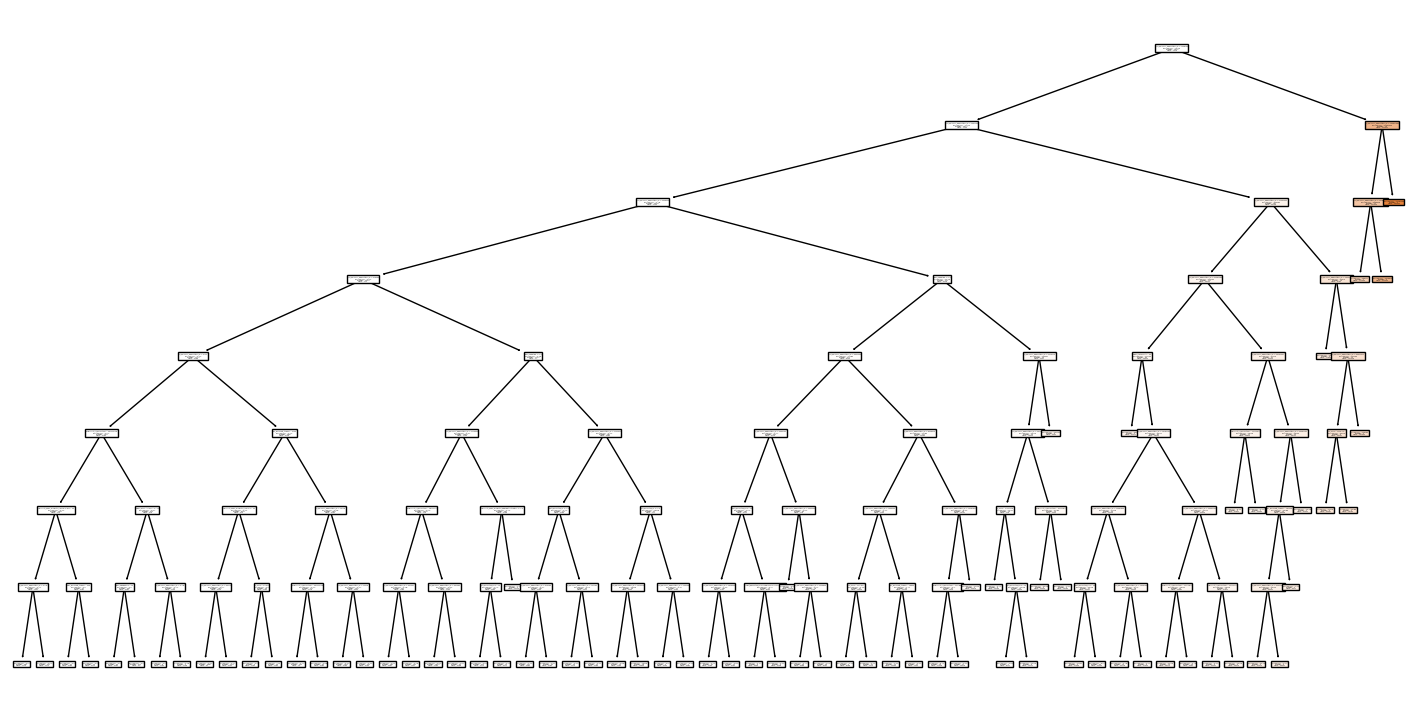

In [143]:
plt.rc('figure', figsize=(18,9))

tp = tree.plot_tree(decision_tree=reg_tree, 
                    feature_names=X.columns.tolist(), 
                    filled=True)

### Etapa 5 Crisp-DM: Avaliação dos resultados

In [144]:
r2_train = reg_tree.score(X=X_train, y=y_train)
r2_test = reg_tree.score(X=X_test, y=y_test)

template = 'O coeficiente de determinação (𝑅2) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(reg_tree.get_depth(), 'treino', r2_train).replace(".", ","))
print(template.format(reg_tree.get_depth(), 'teste', r2_test).replace(".", ","), '\n')

O coeficiente de determinação (𝑅2) da árvore com profundidade = 8 para a base de treino é: 0,96
O coeficiente de determinação (𝑅2) da árvore com profundidade = 8 para a base de teste é: 0,81 



In [145]:
df['cattle_deforestation_exposure_predict'] = np.round(reg_tree.predict(X), 2)
df[['cattle_deforestation_exposure', 'cattle_deforestation_exposure_predict']]

cattle_deforestation_exposure  cattle_deforestation_exposure_predict
0                           1.634094                                   1.63
1                           1.634094                                   1.63
2                           1.634094                                   1.63
3                           1.634094                                   1.63
4                           1.634094                                   1.63
...                              ...                                    ...
31376                       0.000175                                   0.00
31377                       1.634094                                   1.63
31378                       1.634094                                   1.63
31379                       1.634094                                   1.63
31380                       1.634094                                   1.63

[31381 rows x 2 columns]

### Etapa 6 Crisp-DM: Implantação